In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

In [80]:
data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [81]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'km_driven'}>, <Axes: >]], dtype=object)

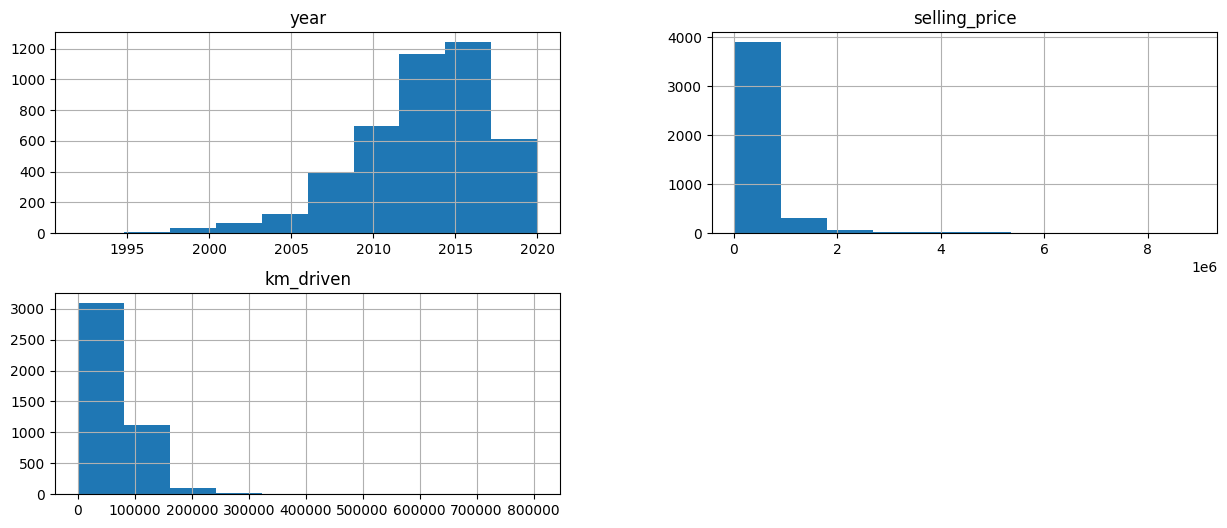

In [83]:
data.hist(figsize=(15,6))

In [84]:
data_new = data.drop(['name'], axis=1)

In [85]:
#Категориальные признаки
df_categorical_features = data_new.select_dtypes(include=[object])

df_categorical_features.columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [86]:
#Числовые признаки
df_numeric_features = data_new.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['year', 'selling_price', 'km_driven'], dtype='object')

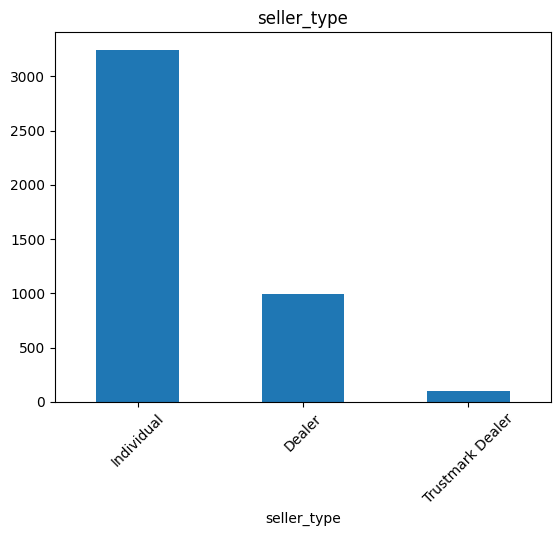

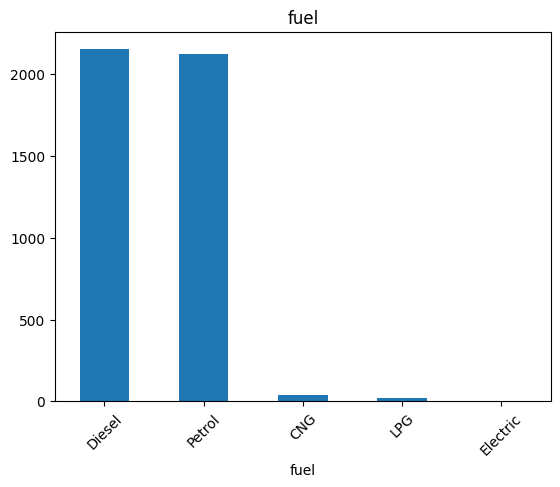

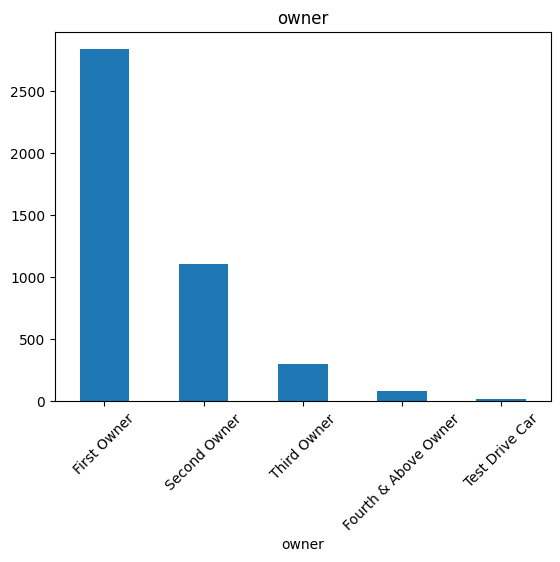

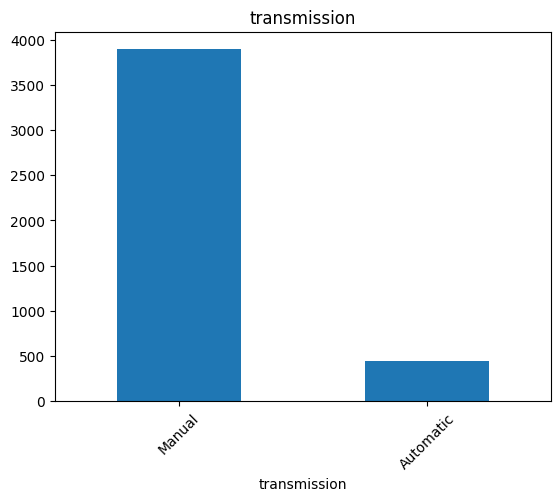

In [87]:
#Диаграмма распределенности типов продавцов
seller_type = ["seller_type"]
fig, ax = plt.subplots(1, len(seller_type))
for i, seller_type in enumerate(data_new[seller_type]):
    data_new[seller_type].value_counts().plot(kind="bar").set_title(seller_type)
plt.xticks(rotation=45)
#plt.yticks(np.arange(0, 45000, 3000.0))
plt.show()

#Диаграмма распределенности типов топлива
fuel = ["fuel"]
fig, ax = plt.subplots(1, len(fuel))
for i, fuel in enumerate(data_new[fuel]):
    data_new[fuel].value_counts().plot(kind="bar").set_title(fuel)
plt.xticks(rotation=45)
#plt.yticks(np.arange(0, 45000, 3000.0))
plt.show()

#Диаграмма распределенности типов владельцев
owner = ["owner"]
fig, ax = plt.subplots(1, len(owner))
for i, owner in enumerate(data_new[owner]):
    data_new[owner].value_counts().plot(kind="bar").set_title(owner)
plt.xticks(rotation=45)
#plt.yticks(np.arange(0, 45000, 3000.0))
plt.show()

#Диаграмма распределенности типов трансмиссии
transmission = ["transmission"]
fig, ax = plt.subplots(1, len(transmission))
for i, transmission in enumerate(data_new[transmission]):
    data_new[transmission].value_counts().plot(kind="bar").set_title(transmission)
plt.xticks(rotation=45)
#plt.yticks(np.arange(0, 45000, 3000.0))
plt.show()

In [88]:
from sklearn.compose import ColumnTransformer

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [89]:
target = data_new['selling_price']
features = data_new.drop(['selling_price'], axis=1)
features["fuel"] = features["fuel"].astype("category")
features["seller_type"] = features["seller_type"].astype("category")
features["transmission"] = features["transmission"].astype("category")
features["owner"] = features["owner"].astype("category")

In [90]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          4340 non-null   int64   
 1   km_driven     4340 non-null   int64   
 2   fuel          4340 non-null   category
 3   seller_type   4340 non-null   category
 4   transmission  4340 non-null   category
 5   owner         4340 non-null   category
dtypes: category(4), int64(2)
memory usage: 85.6 KB


In [91]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=44)

In [92]:
simple_imputer = SimpleImputer(strategy='median')
#std_scaler = StandardScaler()
pipe_num = Pipeline([('imputer', simple_imputer)])

In [93]:
s_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#cat_proc = features[['fuel', 'seller_type', 'transmission', 'owner']].astype("category")
pipe_cat = Pipeline([('imputer', s_imputer), ('encoder', ohe_encoder)])

In [94]:
col_transformer = ColumnTransformer([('num_preproc', pipe_num, [x for x in features.columns if features[x].dtype!='category']),
                                     ('cat_preproc', pipe_cat, [x for x in features.columns if features[x].dtype=='category'])])

In [95]:
res = col_transformer.fit_transform(features_train)

C:\Users\aw347\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [96]:
res_df = pd.DataFrame(res, columns = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()])
res_df

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2018.0,10000.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2005.0,70000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2012.0,120000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2011.0,40000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2016.0,85000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,2009.0,68350.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3468,2013.0,1000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3469,2017.0,10000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3470,2019.0,11000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [97]:
model_1 = lgb.LGBMRegressor(n_estimators=100)

final_pipe = Pipeline([('preproc', col_transformer),
                       ('model', model_1)])

In [98]:
final_pipe.fit(features_train, target_train)
preds = final_pipe.predict(features_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 3472, number of used features: 15
[LightGBM] [Info] Start training from score 507499.410714


C:\Users\aw347\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:
mse = mean_squared_error(target_test, preds)
rmse = (np.sqrt(mean_squared_error(target_test, preds)))
mae = mean_absolute_error(target_test, preds)
r2 = r2_score(target_test, preds)
print("Оценка тестового множества модели LightGBM:")
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

Оценка тестового множества модели LightGBM:
MSE: 76272599439.67
RMSE: 276174.94
MAE: 160536.56
R2: 0.77


In [100]:
print(final_pipe.predict(features_test))

[ 364824.00715584  109970.41081528  390539.82582466  557919.78037268
  367708.33782711  323625.30632219  275730.58357233  453467.37268057
  431174.03023075  262694.35322295  432691.25900104 1030778.29437616
  482960.31436539  352643.76945058  323832.67171438  128723.40643088
  467959.7238442   156816.68315163  114431.12655013  431174.03023075
  750795.00304984  100553.83539506  553948.46621325  123270.91026741
  325868.9186035   411780.64825347  279408.67193536   92726.93652708
  390539.82582466  558034.74770449   82492.718641     77858.66762608
  330402.65288496  445989.59485285  808411.99090702  343839.53496435
 3020553.45069016  295474.25319699  839080.84644006  246862.5312332
  420560.79155613  435575.27545365  242579.97904715  644243.54800925
  366954.92176254  322793.45319984  882064.42112233  438266.76830529
  360940.07986945   87009.934654    195278.15397942   77858.66762608
  696641.33319896  493417.68052559  159853.42833058   55704.50608372
  526585.98797163  683689.60629141 

In [101]:
target_test

2695     250000
1259      75000
2556     114999
3319     700000
2040     110000
         ...   
2368     650000
1558     500000
3565     500000
3284    1500000
2922     170000
Name: selling_price, Length: 868, dtype: int64

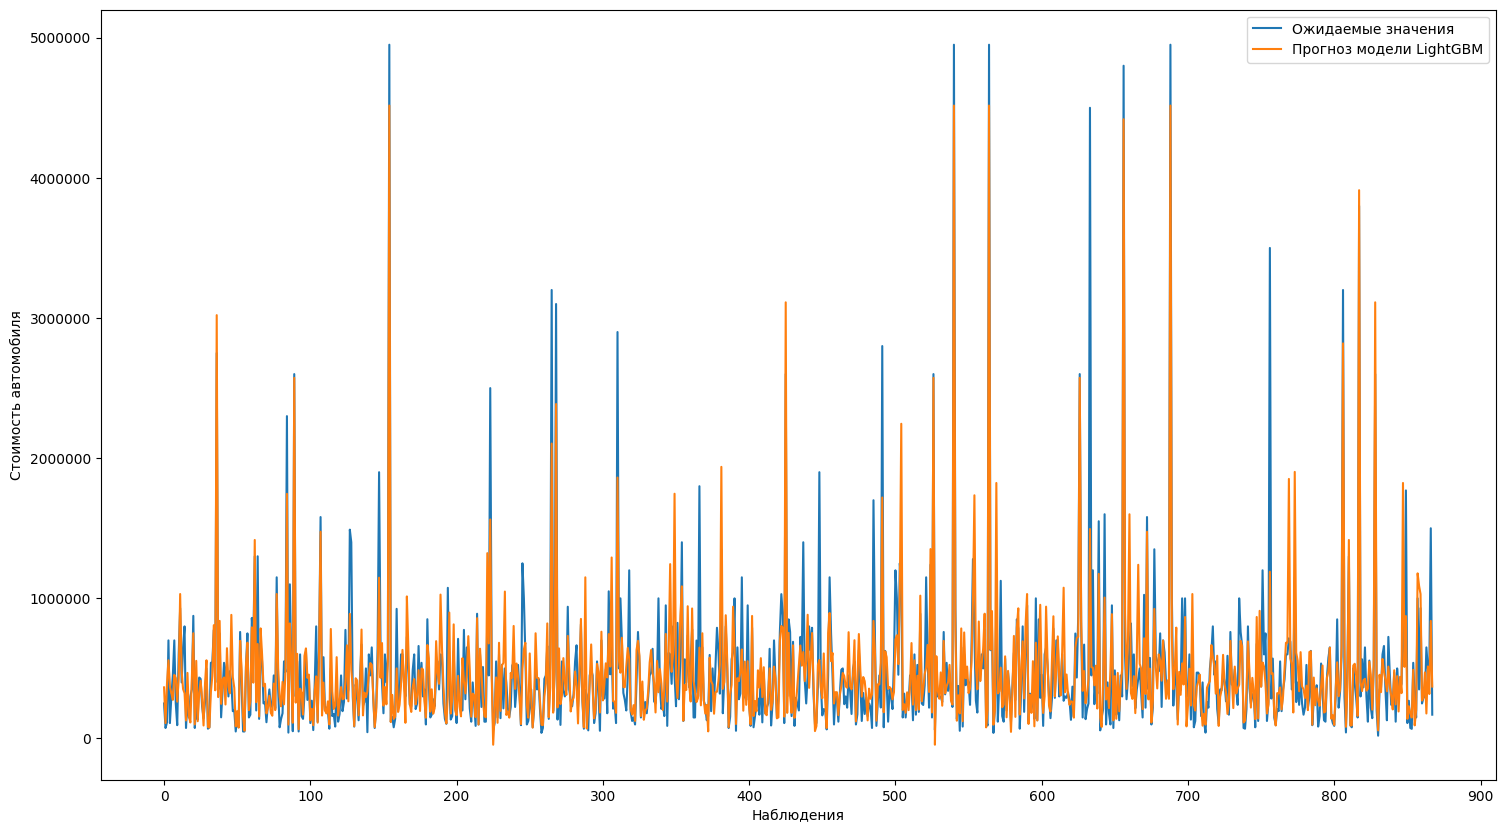

In [102]:
plt.figure(figsize=(18,10))
plt.plot(target_test.values, label = 'Ожидаемые значения')
plt.plot(final_pipe.predict(features_test), label = 'Прогноз модели LightGBM')
plt.xlabel('Наблюдения')
plt.ylabel('Стоимость автомобиля')
plt.ticklabel_format(style='plain')
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
plt.legend()

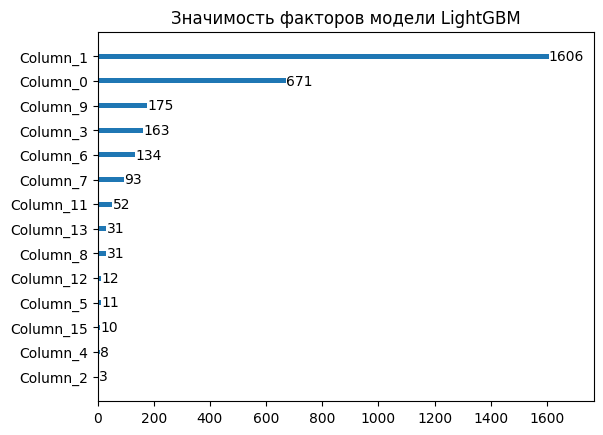

In [108]:
model_1.feature_name = ["year", "km_driven", "fuel_CNG", "fuel_Diesel", "fuel_LPG", "fuel_Petrol", "seller_type_Dealer",	"seller_type_Individual",	"seller_type_Trustmark Dealer", "transmission_Automatic", "transmission_Manual", "owner_First Owner", "owner_Fourth & Above Owner", "owner_Second Owner", "owner_Test Drive Car", "owner_Third Owner"]
lgb.plot_importance(model_1, max_num_features=16)
plt.title('Значимость факторов модели LightGBM')
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.show()